In [3]:
import pandas as pd

In [4]:
import seaborn as sns

In [5]:
data=pd.read_csv('Advertising Dataset.csv',index_col=0)

In [6]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [8]:
data.shape

(200, 4)

In [9]:
%matplotlib inline

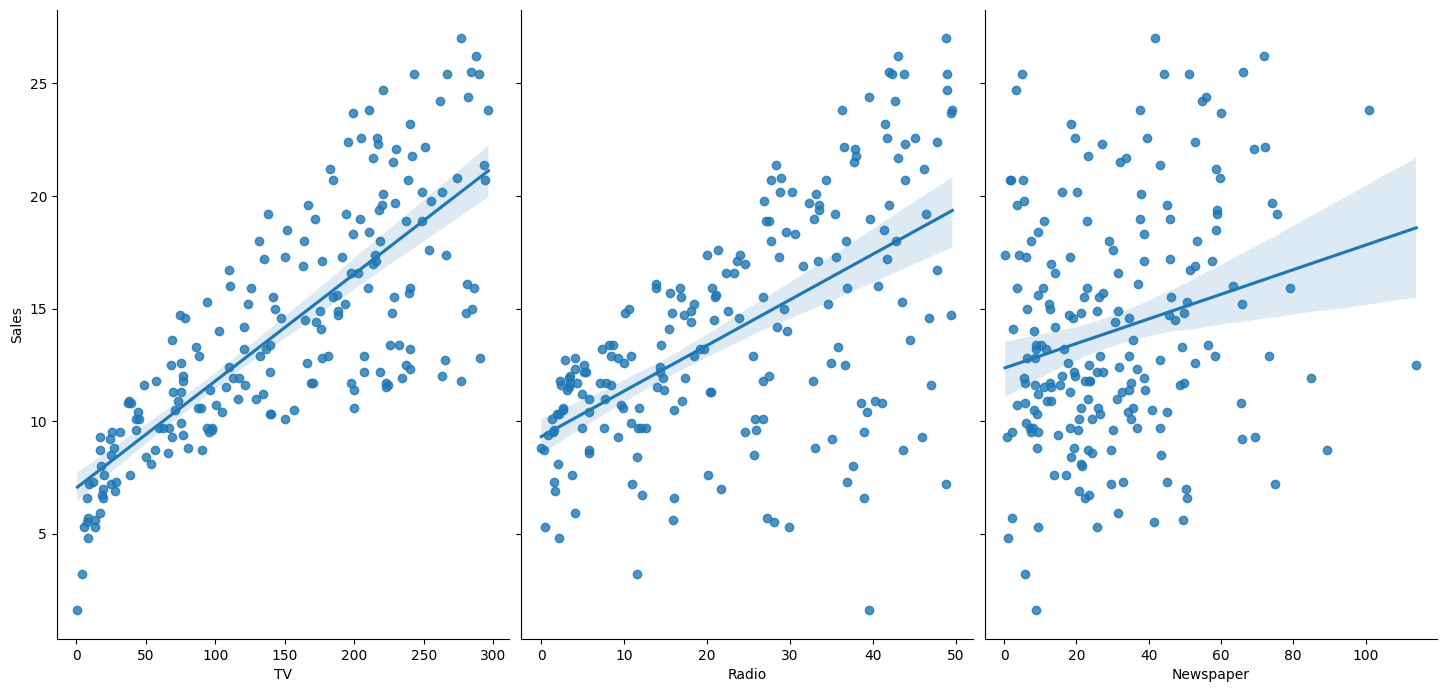

In [10]:
sns.pairplot(data,x_vars=["TV","Radio","Newspaper"],y_vars='Sales',height=7,aspect=0.7,kind="reg")

In [11]:
features=["TV","Radio","Newspaper"]
x=data[["TV","Radio","Newspaper"]]

In [12]:
print(features)

['TV', 'Radio', 'Newspaper']


In [13]:
x.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [14]:
print(type(x))
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [15]:
y=data["Sales"]

In [16]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [17]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


Split x and y into test and train data sets

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

default train data 75% and test data 25%

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [23]:
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179335
[0.04656457 0.17915812 0.00345046]


In [24]:
list(zip(features,linreg.coef_))

[('TV', 0.046564567874150295),
 ('Radio', 0.1791581224508883),
 ('Newspaper', 0.003450464711180402)]

In [25]:
y_pred=linreg.predict(x_test)

In [26]:
true=[100,50,30,20]
pred=[90,50,50,30]

In [27]:
from sklearn import metrics
print(metrics.mean_absolute_error(true,pred))

10.0


In [28]:
print(metrics.mean_squared_error(true,pred))

150.0


In [29]:
print(y_pred)

[21.70910292 16.41055243  7.60955058 17.80769552 18.6146359  23.83573998
 16.32488681 13.43225536  9.17173403 17.333853   14.44479482  9.83511973
 17.18797614 16.73086831 15.05529391 15.61434433 12.42541574 17.17716376
 11.08827566 18.00537501  9.28438889 12.98458458  8.79950614 10.42382499
 11.3846456  14.98082512  9.78853268 19.39643187 18.18099936 17.12807566
 21.54670213 14.69809481 16.24641438 12.32114579 19.92422501 15.32498602
 13.88726522 10.03162255 20.93105915  7.44936831  3.64695761  7.22020178
  5.9962782  18.43381853  8.39408045 14.08371047 15.02195699 20.35836418
 20.57036347 19.60636679]


In [30]:
print(y_test)

59     23.8
41     16.6
35      9.5
103    14.8
185    17.6
199    25.5
96     16.9
5      12.9
30     10.5
169    17.1
172    14.5
19     11.3
12     17.4
90     16.7
111    13.4
119    15.9
160    12.9
36     12.8
137     9.5
60     18.4
52     10.7
17     12.5
45      8.5
95     11.5
32     11.9
163    14.9
39     10.1
29     18.9
194    19.6
28     15.9
48     23.2
166    11.9
195    17.3
178    11.7
177    20.2
98     15.5
175    11.5
74     11.0
70     22.3
173     7.6
109     5.3
108     8.7
190     6.7
15     19.0
57      5.5
20     14.6
115    14.6
40     21.5
186    22.6
125    19.7
Name: Sales, dtype: float64


In [31]:
compare_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
compare_df.reset_index(drop=True, inplace=True)

In [32]:
compare_df['Difference']= compare_df['Actual'] - compare_df['Predicted']

In [33]:
print(compare_df)

    Actual  Predicted  Difference
0     23.8  21.709103    2.090897
1     16.6  16.410552    0.189448
2      9.5   7.609551    1.890449
3     14.8  17.807696   -3.007696
4     17.6  18.614636   -1.014636
5     25.5  23.835740    1.664260
6     16.9  16.324887    0.575113
7     12.9  13.432255   -0.532255
8     10.5   9.171734    1.328266
9     17.1  17.333853   -0.233853
10    14.5  14.444795    0.055205
11    11.3   9.835120    1.464880
12    17.4  17.187976    0.212024
13    16.7  16.730868   -0.030868
14    13.4  15.055294   -1.655294
15    15.9  15.614344    0.285656
16    12.9  12.425416    0.474584
17    12.8  17.177164   -4.377164
18     9.5  11.088276   -1.588276
19    18.4  18.005375    0.394625
20    10.7   9.284389    1.415611
21    12.5  12.984585   -0.484585
22     8.5   8.799506   -0.299506
23    11.5  10.423825    1.076175
24    11.9  11.384646    0.515354
25    14.9  14.980825   -0.080825
26    10.1   9.788533    0.311467
27    18.9  19.396432   -0.496432
28    19.6  18

In [34]:
# Calculate regression metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 1.0668917082595213
Mean Squared Error: 1.9730456202283404
R-squared: 0.9156213613792231
